In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zillow-prize-1/properties_2017.csv
/kaggle/input/zillow-prize-1/sample_submission.csv
/kaggle/input/zillow-prize-1/zillow_data_dictionary.xlsx
/kaggle/input/zillow-prize-1/train_2016_v2.csv
/kaggle/input/zillow-prize-1/properties_2016.csv
/kaggle/input/zillow-prize-1/train_2017.csv


### Loading dataset:

In [2]:
# starting with train_file exploration
train_df = pd.read_csv("../input/zillow-prize-1/train_2017.csv", parse_dates=["transactiondate"])
train_df.shape

(77613, 3)

In [3]:
train_df.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


### logerror analysis

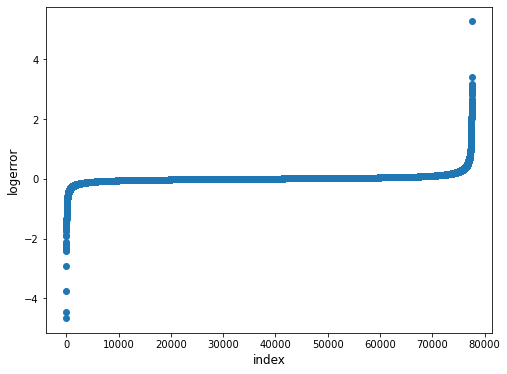

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

Remove outliers by replacing the outlier vals with upper and lower limit vals

In [5]:
ulimit = np.percentile(train_df.logerror.values, 99)
llimit = np.percentile(train_df.logerror.values, 1)

In [6]:
train_df.loc[train_df['logerror'] > ulimit, 'logerror'] = ulimit
train_df.loc[train_df['logerror'] < llimit, 'logerror'] = llimit

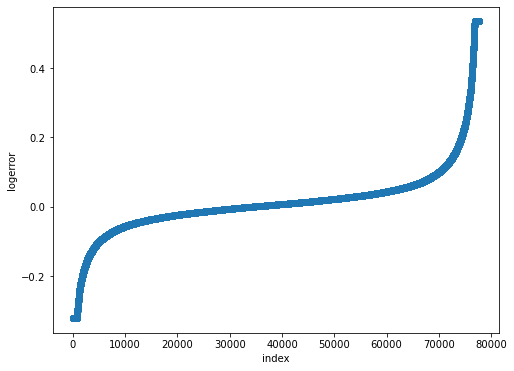

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index')
plt.ylabel('logerror')
plt.show()

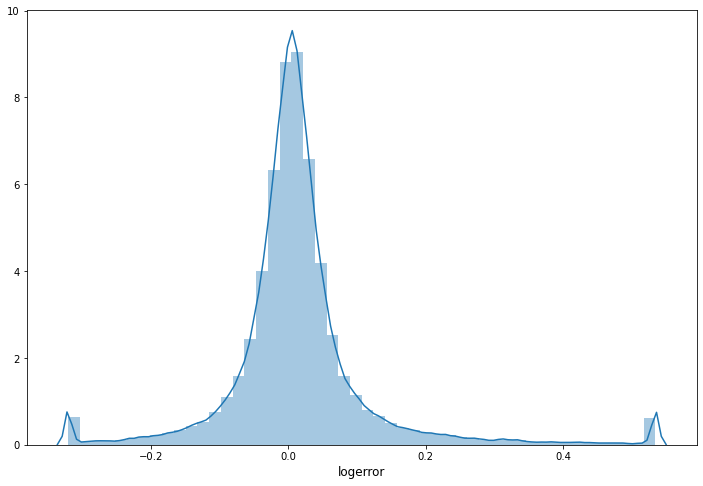

In [8]:
plt.figure(figsize=(12, 8))
sns.distplot(train_df.logerror.values, bins=50)
plt.xlabel('logerror', fontsize=12)
plt.show()

 normal distribution obtained on log error

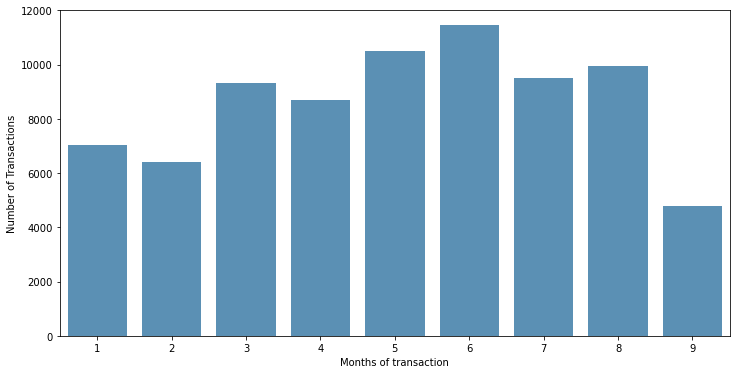

In [9]:
train_df['transaction_month'] = train_df['transactiondate'].dt.month

index_of_months = train_df['transaction_month'].value_counts().index
unique_months_vals = train_df['transaction_month'].value_counts().values

plt.figure(figsize=(12, 6))
sns.barplot(index_of_months, unique_months_vals, alpha=0.8, color=color[0])
plt.xlabel('Months of transaction')
plt.ylabel('Number of Transactions')
plt.show()

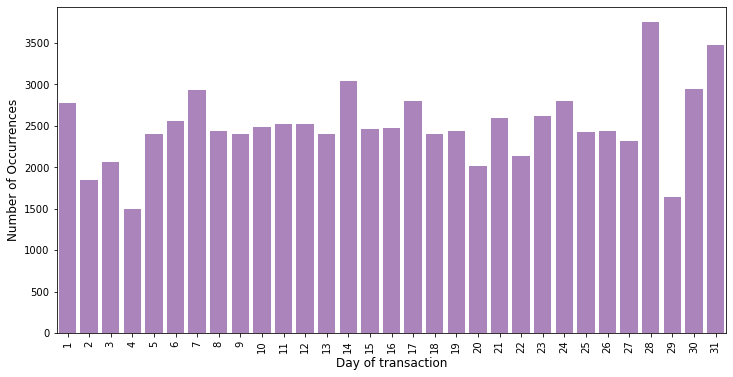

In [10]:
train_df['transaction_day'] = train_df['transactiondate'].dt.day

cnt_srs = train_df['transaction_day'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color = "#9b59b6")
plt.xticks(rotation='vertical')
plt.xlabel('Day of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [11]:
temp_df = train_df['parcelid'].value_counts().reset_index()
temp_df['parcelid'].value_counts()

1    77218
2      193
3        3
Name: parcelid, dtype: int64

So most of the parcel ids are appearing only once in the dataset.

In [12]:
prop_df = pd.read_csv("../input/zillow-prize-1/properties_2017.csv")
prop_df.shape

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [13]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [14]:
prop_df.isnull().sum().reset_index()

,index,0
0,parcelid,0
1,airconditioningtypeid,2169855
2,architecturalstyletypeid,2979156
3,basementsqft,2983590
4,bathroomcnt,2957
5,bedroomcnt,2945
6,buildingclasstypeid,2972486
7,buildingqualitytypeid,1043822
8,calculatedbathnbr,117156
9,decktypeid,2967838


In [15]:
missing_df = prop_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']

missing_df = missing_df.loc[missing_df['missing_count'] > 0]
missing_df = missing_df.sort_values(by='missing_count')

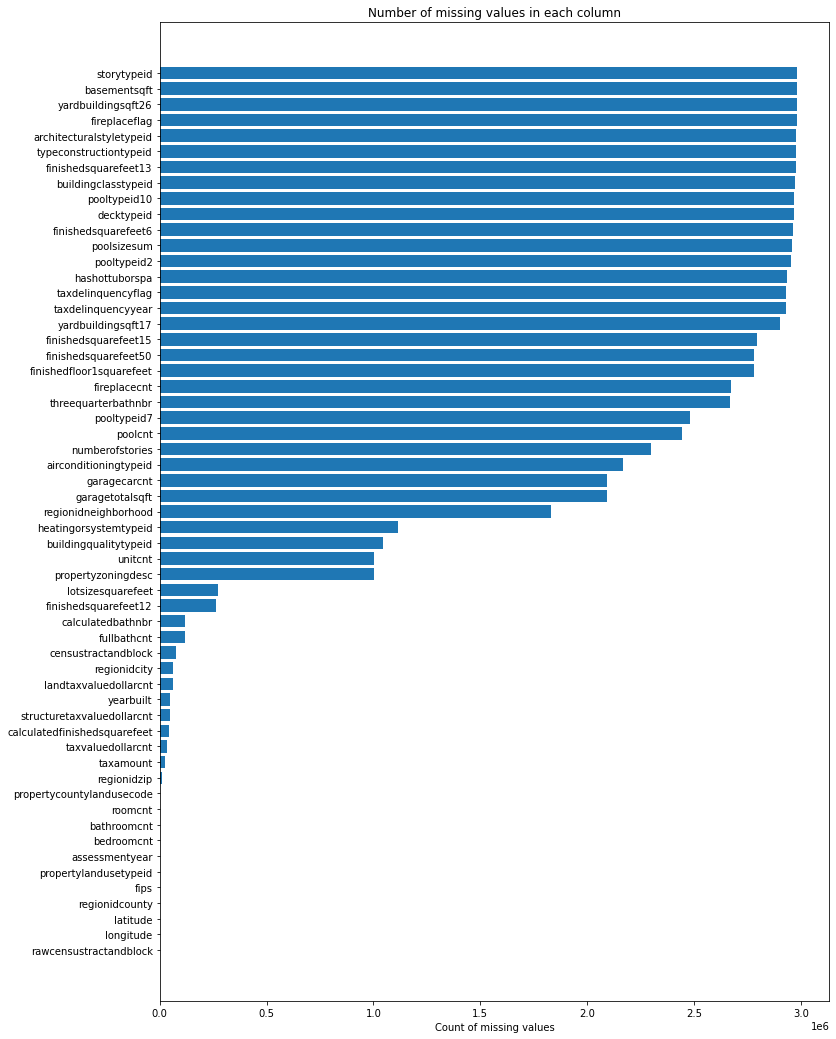

In [16]:
ind = np.arange(missing_df.shape[0])
fig, ax = plt.subplots(figsize=(12, 18))
rects = ax.barh(ind, missing_df.missing_count.values)
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

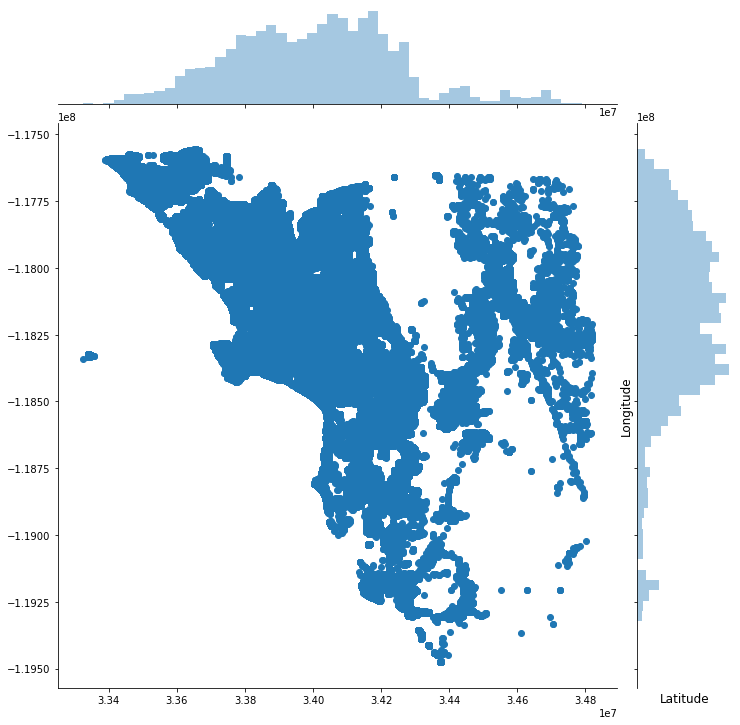

In [17]:
plt.figure(figsize=(12, 12))
sns.jointplot(x = prop_df.latitude.values, y = prop_df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

 Now let us merge both train and prop**

In [18]:
merged_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
merged_df.head()

,parcelid,logerror,transactiondate,transaction_month,transaction_day,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,2017-01-01,1,1,NaN,NaN,NaN,3.5,4.0,...,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,17052889,0.055619,2017-01-01,1,1,NaN,NaN,NaN,1.0,2.0,...,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,14186244,0.005383,2017-01-01,1,1,NaN,NaN,NaN,2.0,3.0,...,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13
3,12177905,-0.103410,2017-01-01,1,1,NaN,NaN,NaN,3.0,4.0,...,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13
4,10887214,0.006940,2017-01-01,1,1,1.0,NaN,NaN,3.0,3.0,...,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13


### check dtypes of variables:

In [19]:
pd.options.display.max_rows = 65

dtype_df = merged_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,transaction_day,int64
5,airconditioningtypeid,float64
6,architecturalstyletypeid,float64
7,basementsqft,float64
8,bathroomcnt,float64
9,bedroomcnt,float64


In [20]:
dtype_df.groupby("Column Type").count().reset_index()

,Column Type,Count
0,int64,3
1,float64,53
2,datetime64[ns],1
3,object,5


In [21]:
merged_df.mean(axis=0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


parcelid                        1.300781e+07
logerror                        1.442724e-02
transaction_month               5.061575e+00
transaction_day                 1.652463e+01
airconditioningtypeid           1.812013e+00
architecturalstyletypeid        7.386473e+00
basementsqft                    6.797200e+02
bathroomcnt                     2.298496e+00
bedroomcnt                      3.053223e+00
buildingclasstypeid             3.933333e+00
buildingqualitytypeid           6.533779e+00
calculatedbathnbr               2.316392e+00
decktypeid                      6.600000e+01
finishedfloor1squarefeet        1.366165e+03
calculatedfinishedsquarefeet    1.784935e+03
finishedsquarefeet12            1.760285e+03
finishedsquarefeet13            1.388762e+03
finishedsquarefeet15            2.354491e+03
finishedsquarefeet50            1.381389e+03
finishedsquarefeet6             2.082500e+03
fips                            6.048814e+03
fireplacecnt                    1.191217e+00
fullbathcn

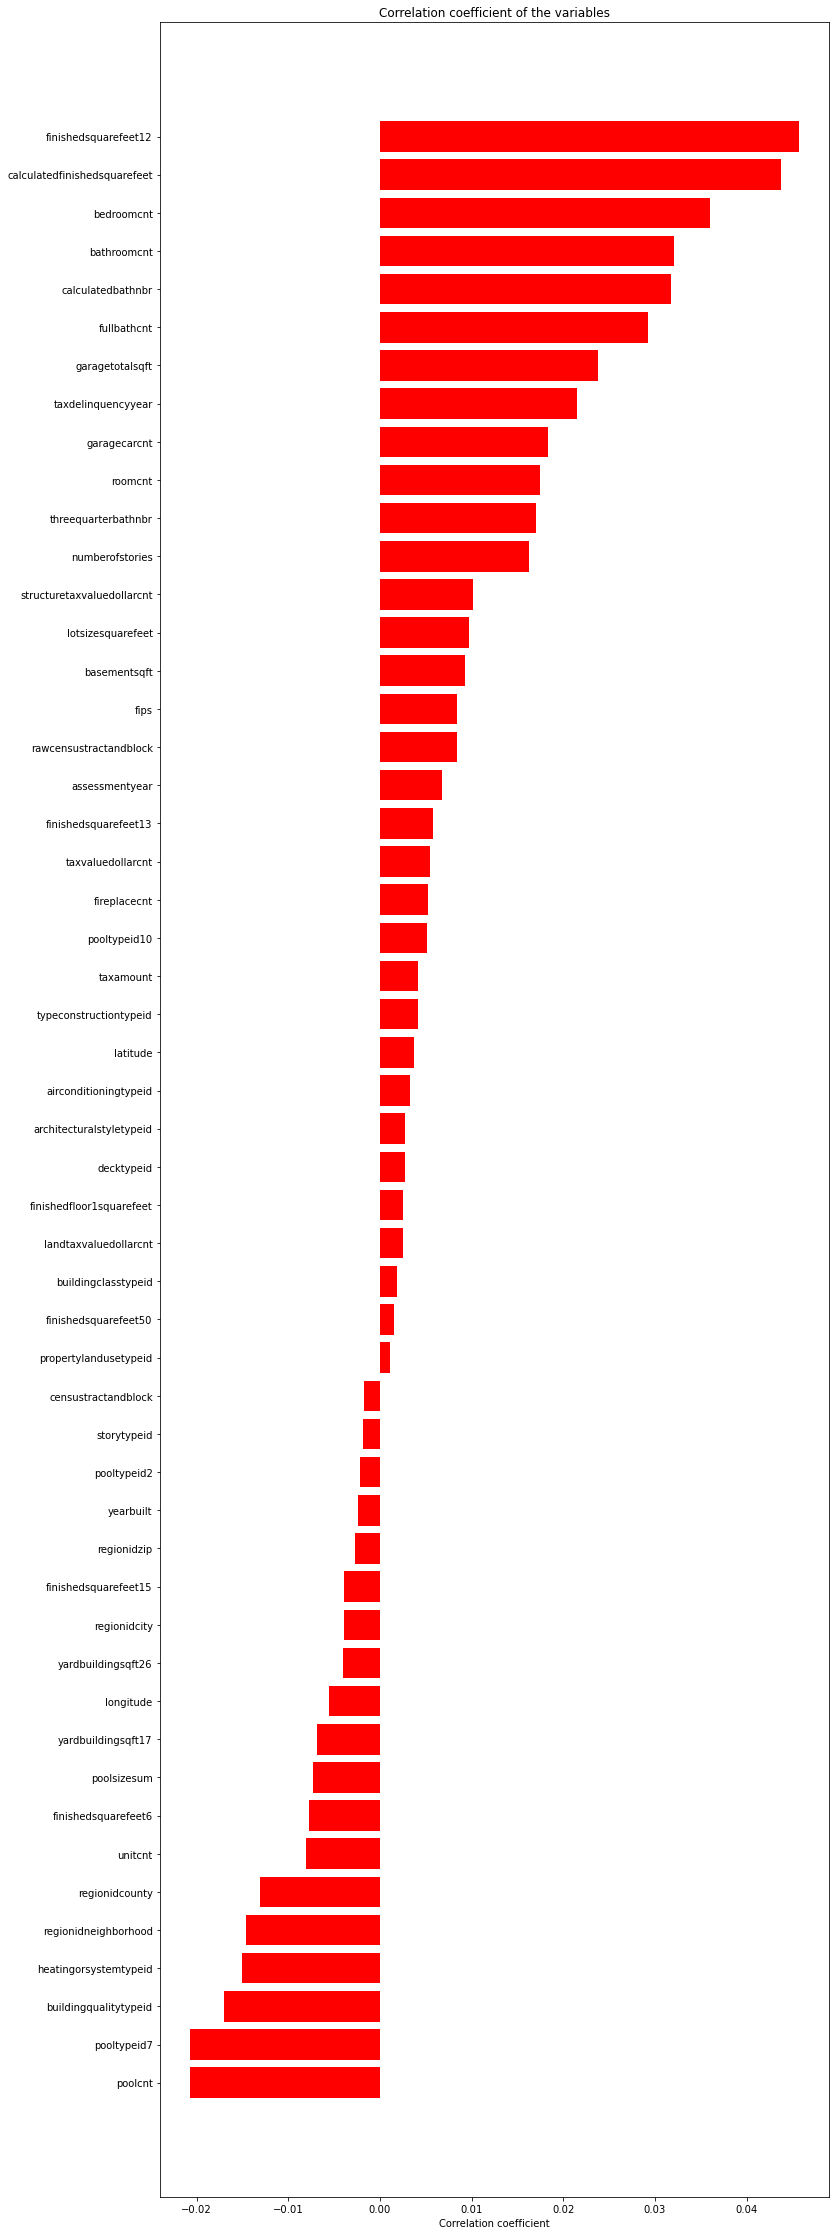

In [22]:
merged_df = merged_df.fillna(0)

x_cols = [col for col in merged_df.columns if col not in ['logerror'] if merged_df[col].dtype == 'float64']

labels = []
values = []

# check corr of each col wrt 'logerror' col
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(merged_df[col].values, merged_df.logerror.values)[0,1])

corr_df = pd.DataFrame({'col_labels': labels, 'corr_values': values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='r')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

There are few variables at the top of this graph without any correlation values|

In [23]:
corr_zero_cols = ['assessmentyear', 'storytypeid', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt', 'decktypeid', 'buildingclasstypeid']

In [24]:
for col in corr_zero_cols:
    print(col, merged_df[col].nunique())


assessmentyear 2
storytypeid 2
pooltypeid2 2
pooltypeid7 2
pooltypeid10 2
poolcnt 2
decktypeid 2
buildingclasstypeid 3


In [25]:
corr_df.loc[(corr_df['corr_values'] > 0.02) | (corr_df['corr_values'] < -0.01), ('col_labels', 'corr_values')]

,col_labels,corr_values
25,poolcnt,-0.020697
29,pooltypeid7,-0.020678
6,buildingqualitytypeid,-0.017058
21,heatingorsystemtypeid,-0.015093
34,regionidneighborhood,-0.014559
33,regionidcounty,-0.013061
50,taxdelinquencyyear,0.021457
20,garagetotalsqft,0.023787
18,fullbathcnt,0.029284
7,calculatedbathnbr,0.031791


In [26]:
corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

,col_labels,corr_values
25,poolcnt,-0.020697
29,pooltypeid7,-0.020678
6,buildingqualitytypeid,-0.017058
21,heatingorsystemtypeid,-0.015093
34,regionidneighborhood,-0.014559
33,regionidcounty,-0.013061
50,taxdelinquencyyear,0.021457
20,garagetotalsqft,0.023787
18,fullbathcnt,0.029284
7,calculatedbathnbr,0.031791


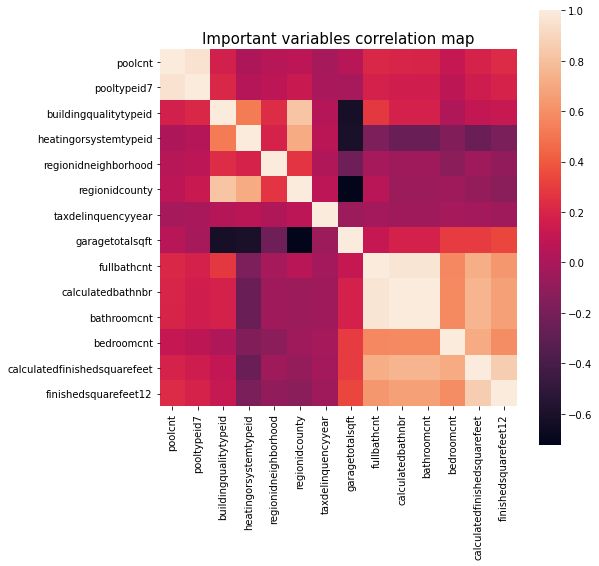

In [27]:
cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = merged_df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [28]:
cols_to_use

['poolcnt',
 'pooltypeid7',
 'buildingqualitytypeid',
 'heatingorsystemtypeid',
 'regionidneighborhood',
 'regionidcounty',
 'taxdelinquencyyear',
 'garagetotalsqft',
 'fullbathcnt',
 'calculatedbathnbr',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12']

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

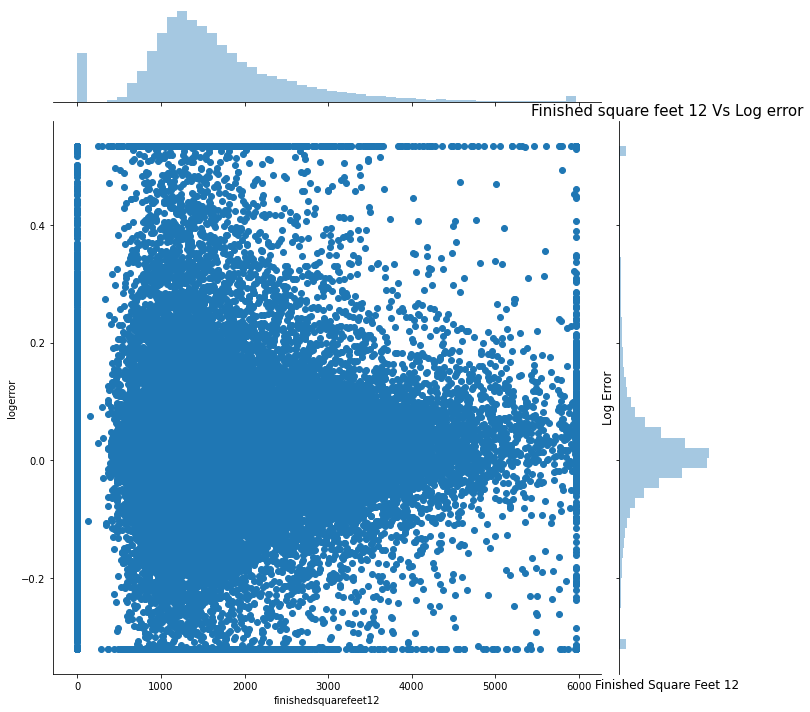

In [29]:
col = 'finishedsquarefeet12'

upper_limit = np.percentile(merged_df[col].values, 99.5)
lower_limit = np.percentile(merged_df[col].values, 0.5)

merged_df.loc[merged_df[col] > upper_limit, col] = upper_limit
merged_df.loc[merged_df[col] < lower_limit, col] = lower_limit

plt.figure(figsize=(12,12))
sns.jointplot(col, 'logerror', data = merged_df, size=10, color=color[0])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 Vs Log error", fontsize=15)
plt.show()

Seems the range of logerror narrows down with increase in finished square feet 12 variable. Probably larger houses are easy to predict

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

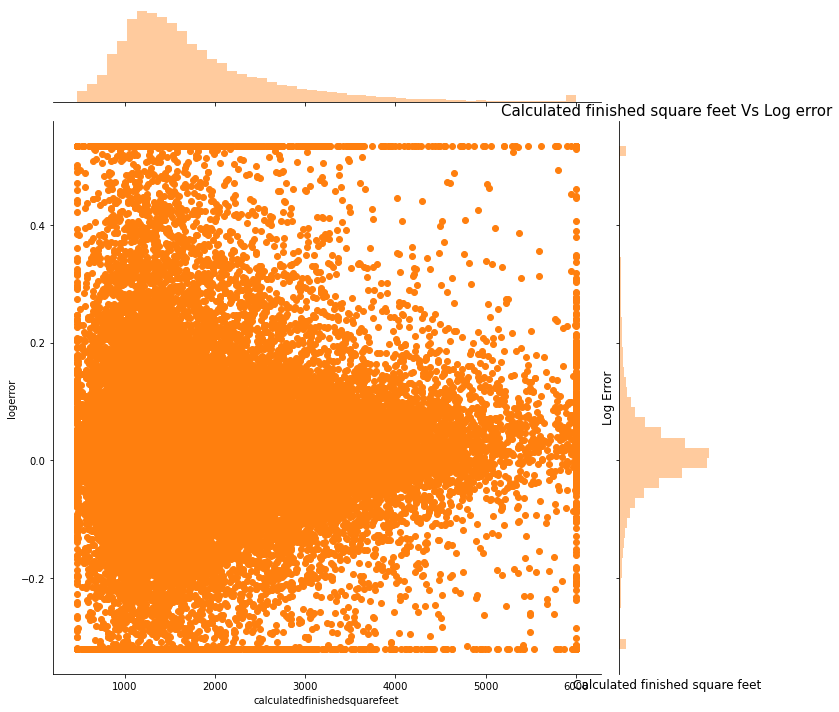

In [30]:
col = "calculatedfinishedsquarefeet"

upper_limit = np.percentile(merged_df[col].values, 99.5)
lower_limit = np.percentile(merged_df[col].values, 0.5)

merged_df.loc[merged_df[col] > upper_limit, col] = upper_limit
merged_df.loc[merged_df[col] < lower_limit, col] = lower_limit

plt.figure(figsize=(12,12))
sns.jointplot(col, 'logerror', data = merged_df, size=10, color=color[1])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated finished square feet', fontsize=12)
plt.title("Calculated finished square feet Vs Log error", fontsize=15)
plt.show()

Bathroom count:

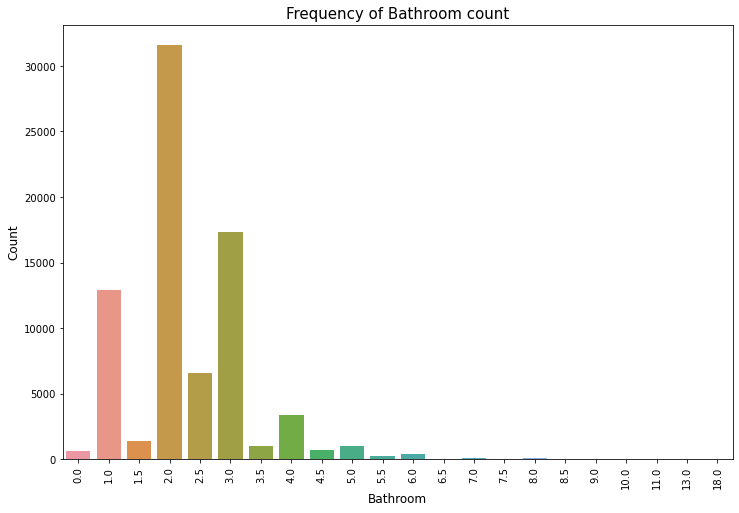

In [31]:
col = "bathroomcnt"
plt.figure(figsize=(12,8))
sns.countplot(x = col, data=merged_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

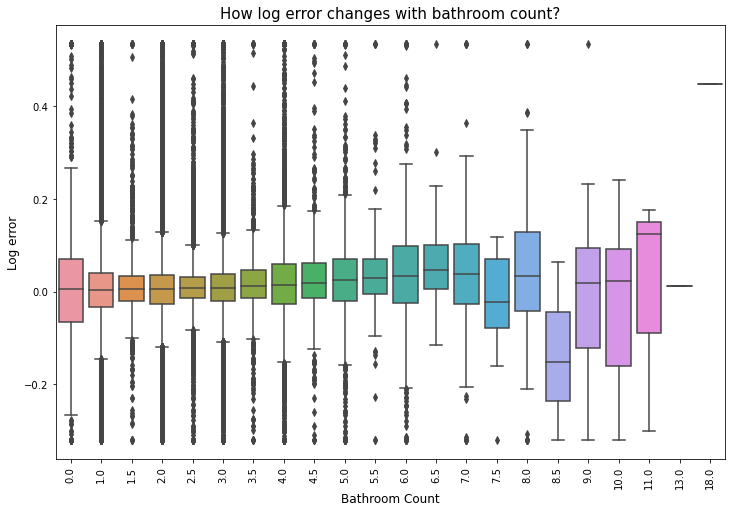

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(x = col, y='logerror', data=merged_df)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Bathroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("How log error changes with bathroom count?", fontsize=15)
plt.show()

Bedroom count:

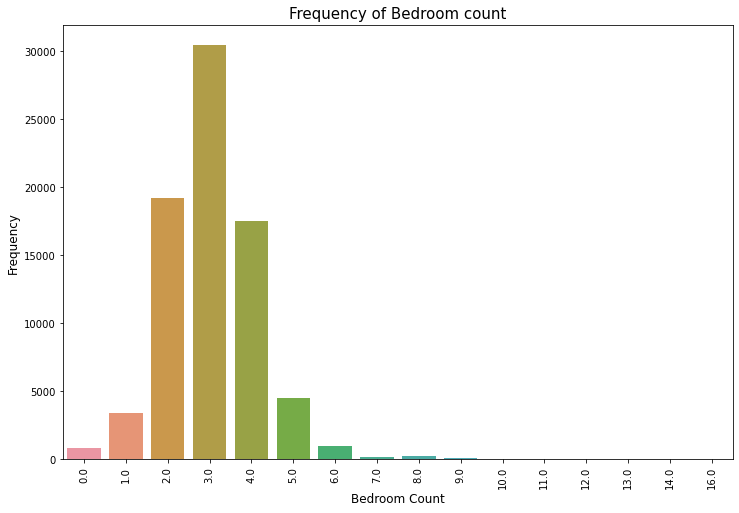

In [33]:
col = "bedroomcnt"

plt.figure(figsize=(12,8))
sns.countplot(col, data = merged_df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=15)
plt.show()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

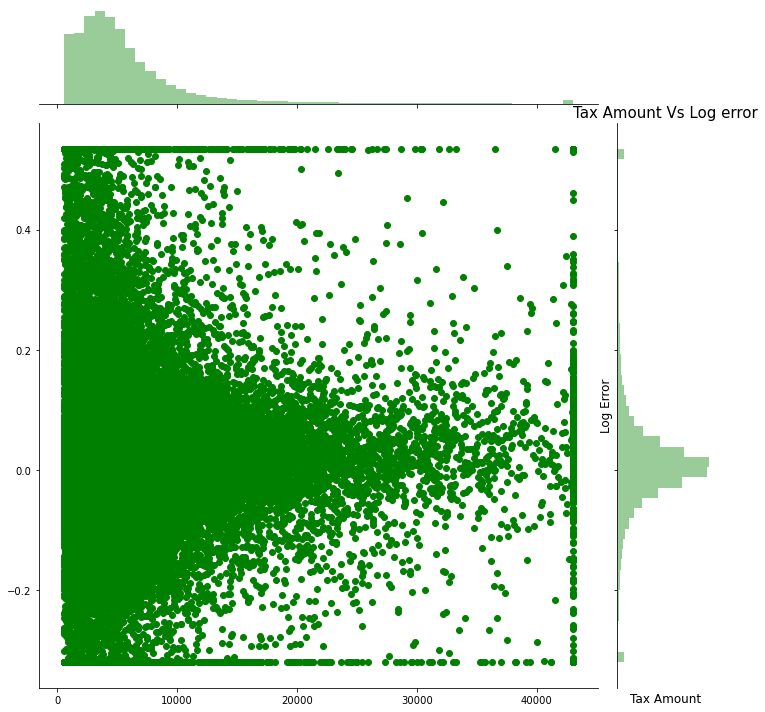

In [34]:
col = "taxamount"
ulimit = np.percentile(merged_df[col].values, 99.5)
llimit = np.percentile(merged_df[col].values, 0.5)
merged_df[col].loc[merged_df[col]>ulimit] = ulimit
merged_df[col].loc[merged_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=merged_df['taxamount'].values, y=merged_df['logerror'].values, size=10, color='g')
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Tax Amount', fontsize=12)
plt.title("Tax Amount Vs Log error", fontsize=15)
plt.show()

In [35]:
merged_df.columns

Index(['parcelid', 'logerror', 'transactiondate', 'transaction_month',
       'transaction_day', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 

In [36]:
train_y = merged_df['logerror'].values
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
train_df = merged_df.drop(['parcelid', 'logerror', 'transactiondate', 'transaction_month']+cat_cols, axis=1)


In [37]:
import xgboost as xgb

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}

dtrain = xgb.DMatrix(train_df, train_y, feature_names=train_df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

[06:16:26] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[06:16:26] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:16:33] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


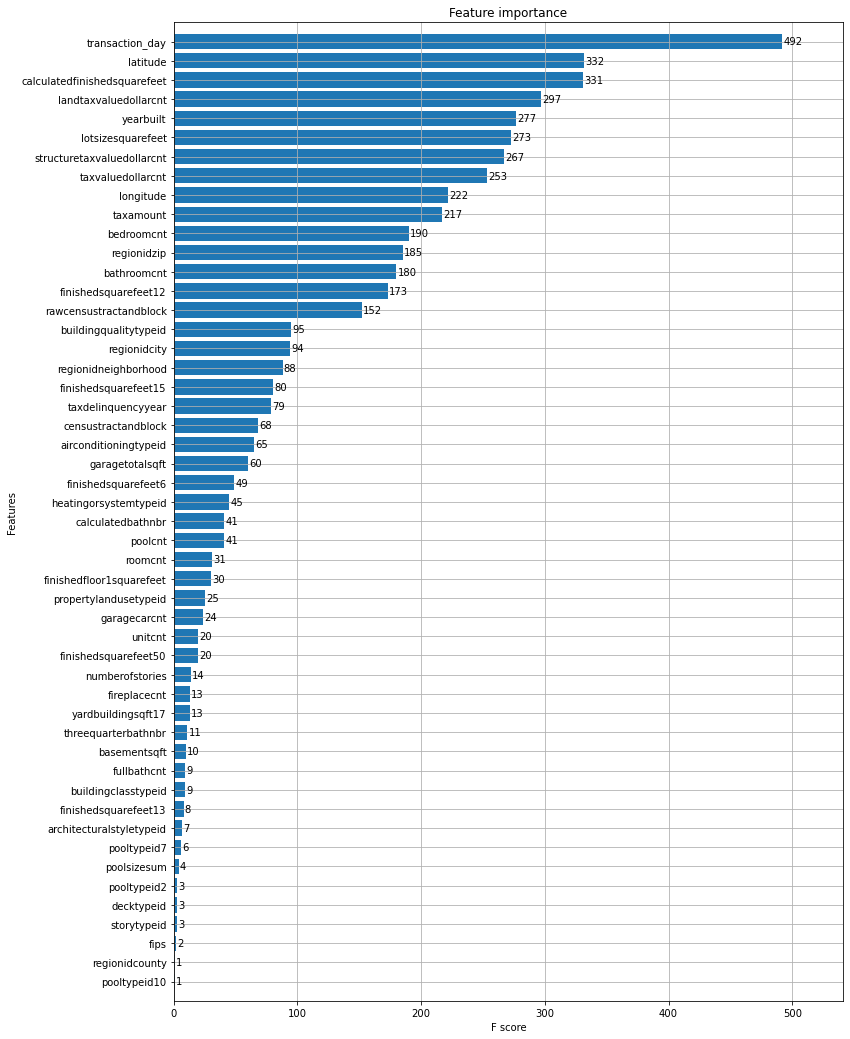

In [38]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()